In [1]:
import librosa
array, sampling_rate = librosa.load(librosa.ex("trumpet"))

In [ ]:
sampling_rate

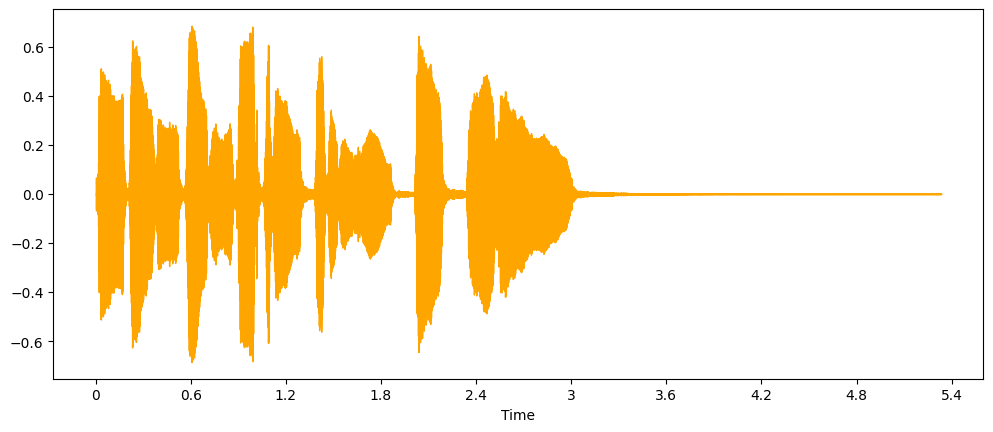

In [5]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate, color="orange")

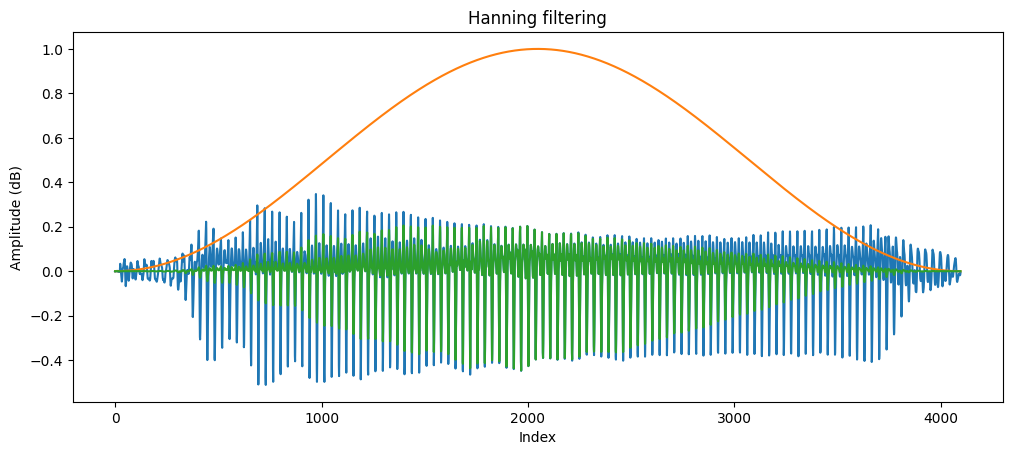

In [6]:
import numpy as np

dft_input = array[:4096]

plt.figure().set_figwidth(12)
plt.plot(dft_input)
plt.xlabel("Index")
plt.ylabel("Amplitude (dB)")
plt.title("Hanning filtering")


# Hanning filter
window = np.hanning(len(dft_input))
plt.plot(window)

# Filtering
windowed_input = dft_input * window

plt.plot(windowed_input)

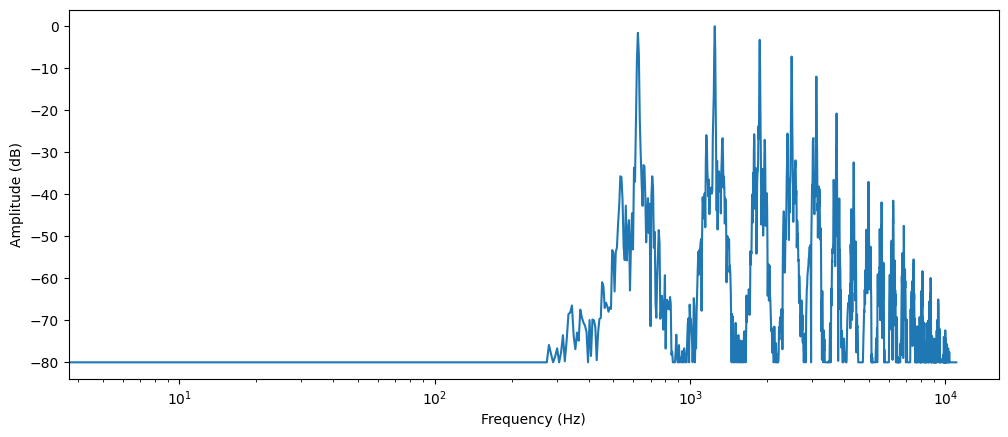

In [7]:
# calculate the DFT
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

Text(0.5, 1.0, 'Spectrogram')

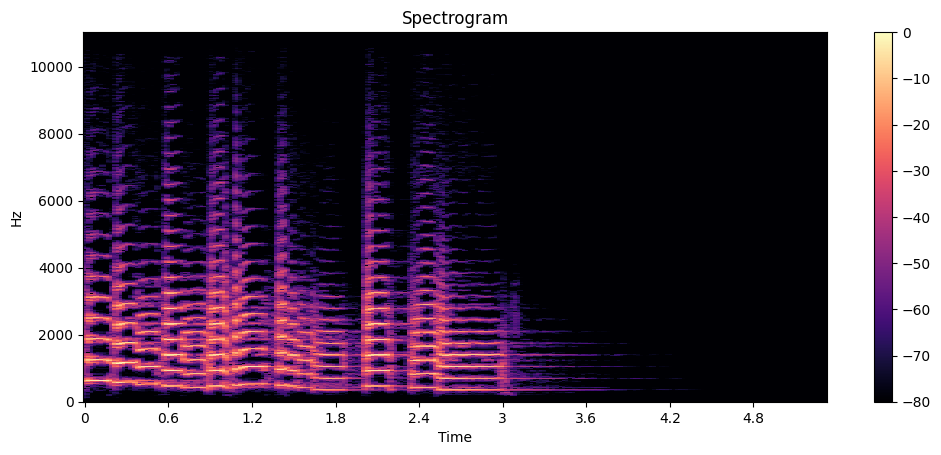

In [8]:
import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()
plt.title("Spectrogram")

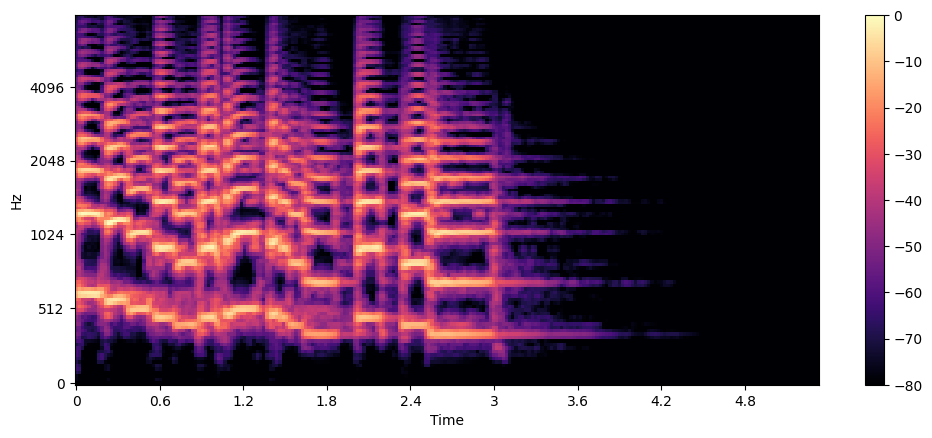

In [9]:
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()